In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [8]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
x_train=train_datagen.flow_from_directory(directory=r'C:\Users\91913\project_dev\data\train',target_size=(64,64),batch_size=32,class_mode='categorical')
                                          

Found 15341 images belonging to 6 classes.


In [10]:
x_test=test_datagen.flow_from_directory(directory=r'C:\Users\91913\project_dev\data\test',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 6825 images belonging to 6 classes.


In [13]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D

In [15]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(32))

In [22]:
model.add(Dense(6,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                        

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

C:\Users\91913\AppData\Local\Temp\ipykernel_40184\1926459362.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
480/480 [==============================] - 75s 154ms/step - loss: 0.8666 - accuracy: 0.7056 - val_loss: 0.6230 - val_accuracy: 0.7796
Epoch 2/10
480/480 [==============================] - 59s 122ms/step - loss: 0.2768 - accuracy: 0.9166 - val_loss: 0.4389 - val_accuracy: 0.8716
Epoch 3/10
480/480 [==============================] - 58s 122ms/step - loss: 0.2013 - accuracy: 0.9391 - val_loss: 0.4706 - val_accuracy: 0.8675
Epoch 4/10
480/480 [==============================] - 59s 123ms/step - loss: 0.1729 - accuracy: 0.9479 - val_loss: 0.3641 - val_accuracy: 0.9034
Epoch 5/10
480/480 [==============================] - 61s 127ms/step - loss: 0.1583 - accuracy: 0.9519 - val_loss: 0.4433 - val_accuracy: 0.9010
Epoch 6/10
480/480 [==============================] - 61s 126ms/step - loss: 0.1429 - accuracy: 0.9578 - val_loss: 0.4426 - val_accuracy: 0.8894
Epoch 7/10
480/480 [==============================] - 61s 127ms/step - loss: 0.1326 - accuracy: 0.9598 - val_loss: 0.4584 - val_ac

In [27]:
model.save('ECG.h5')

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model("ECG.h5")

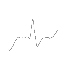

In [60]:
img=image.load_img('uploads\PAC.png',target_size=(64,64))
img

In [61]:
x=image.img_to_array(img)

In [62]:
x=np.expand_dims(x,axis=0)

In [65]:
pred=model.predict(x)

1/1 [==============================] - 0s 221ms/step


In [66]:
pred


array([[0.000000e+00, 1.000000e+00, 0.000000e+00, 2.204437e-11,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [71]:
index=['Left Bundle Branch Block','Normal','Premature Atrial Contraction','Premature ventricular Contractions','Right bundle branch block','Ventricular fibrillation']
pred_id=pred.argmax(axis=1)[0]

In [73]:
result=str(index[pred_id])
result

'Normal'